# Table of Contents

## [1. What is SVM?](#1)
## [2. Feature Scaling](#2)
## [3.Linear SVM](#3)
### [3.1 Hard vs Soft Margin](#4)
### [3.2 Hypothesis Function](#5)
### [3.3 Hard Margin Linear SVM Cost Function ](#6)
### [3.4 Soft Margin Linear SVM Cost Function ](#7)
### [3.5 Dual Form ](#8)
## [4. Non Linear SVM](#9)
### [4.1 Kernel Trick ](#10)
### [4.2 Common Types of Kernel ](#11)
## [5. Support Vector Regression ](#12)
### [5.1 Cost Function](#13)
### [5.2 Slack variables and Cost Function](#14)
## [6. Assumptions of SVM](#15)
## [7. Hyperparameter Optimization](#16)
## [8. Solution to Overfitting](#17)
## [9. Pros vs Cons](#18)
## [10. Sources](#19)

# What is SVM? <a class="anchor" id="1"></a>

A Support Vector Machine (SVM) is a very powerful and versatile Machine Learning
model, capable of performing linear or nonlinear classification, regression, and even
outlier detection.

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.
<img src="https://miro.medium.com/max/405/0*0o8xIA4k3gXUDCFU.png">

<b>Common terms used:</b>

1. Kernel: The function used to map a lower dimensional data into a higher dimensional data.

2. Hyper Plane: In SVM this is basically the separation line between the data classes. Although in SVR we are going to define it as the line that will will help us predict the continuous value or target value

3. Boundary line: In SVM there are two lines other than Hyper Plane which creates a margin . The support vectors can be on the Boundary lines or outside it. This boundary line separates the two classes. In SVR the concept is same.

4. Support vectors: These are the data points which are closest to the boundary. Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. 

<b>Whats the main difference between SVR and a simple regression model?</b>

In simple regression we try to minimise the error rate. While in SVR we try to fit the error within a certain threshold. This might be a bit confusing but let me explain.

# Feature Scaling (Standardizing the features) <a class="anchor" id="2"></a>

Scaling improves the performance of SVMs. SVMs are sensitive to the feature scales, as you can see in
the figure below: on the left plot, the vertical scale is much larger than the
horizontal scale, so the widest possible street is close to horizontal.
After feature scaling (e.g., using Scikit-Learn’s StandardScaler),
the decision boundary looks much better (on the right plot).

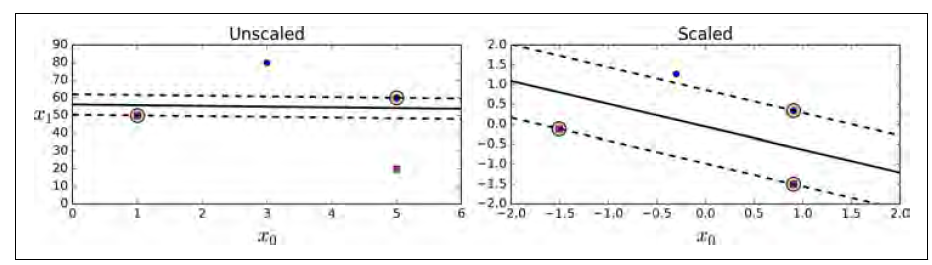

# Linear SVM Classification <a class="anchor" id="3"></a>

The two classes can clearly be separated easily with a straight line (they are linearly separable). You can think of an SVM classifier as fitting the widest possible street (represented by the parallel dashed lines) between the classes.
This is called large margin classification.

<img src="https://www.researchgate.net/profile/Michael_Eckmann/publication/261446575/figure/fig7/AS:669331608322058@1536592499234/Example-of-an-SVM-classifier-considering-a-linear-case.png" width=400>

## Hard margin vs Soft margin classification <a class="anchor" id="4"></a>

<img src="https://miro.medium.com/max/552/1*CD08yESKvYgyM7pJhCnQeQ.png">

A hard margin means that an SVM is very rigid in classification and tries to work extremely well in the training set. If we strictly impose that all instances be off the street and on the right side, this is
called hard margin classification. There are two main issues with hard margin classification.
First, it only works if the data is linearly separable, and second it is quite sensitive
to outliers.

To avoid these issues it is preferable to use a more flexible model. The objective is to
find a good balance between keeping the street as large as possible and limiting the
margin violations (i.e., instances that end up in the middle of the street or even on the
wrong side). This is called soft margin classification.

# Hypothesis and Cost Function

The linear SVM classifier model predicts the class of a new instance x by simply computing
the decision function wT · x + b = w1 x1 + ⋯ + wn xn + b: if the result is positive,
the predicted class ŷ is the positive class (1), or else it is the negative class (0)


## Hypothesis function <a class="anchor" id="5"></a>

<img src="https://miro.medium.com/max/573/1*oR5UcpMl2eyKHV5jZMW92A.png">
The point above or on the hyperplane will be classified as class +1, and the point below the hyperplane will be classified as class -1.

<img src="https://miro.medium.com/max/678/1*bHnGYD3ddJui2x4z5gOtdA.png">

Training a linear SVM classifier means finding the value of w and b that
make the margin as wide as possible while avoiding margin violations (hard margin)
or limiting them (soft margin).

We can combine the hypothesis functions by introducing $y_{i}$
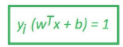

## Hard Margin Linear SVM Cost function <a class="anchor" id="6"></a>

In both the soft margin and hard margin case we are maximizing the margin between support vectors, i.e. maximizing 2/$||w||$ or  minimizing  1/2$||w||^{2}$

<img src="https://qph.fs.quoracdn.net/main-qimg-8104631897160389703670f55de8357d.webp" width=400>

## Soft Margin Linear SVM Cost function <a class="anchor" id="7"></a>

To get the soft margin objective, we need to introduce a slack variable ζ(i) ≥ 0 for each
instance:4 ζ(i) measures how much the ith instance is allowed to violate the margin. We
now have two conflicting objectives: making the slack variables as small as possible to
reduce the margin violations, and making 1/2$||w||^{2}$ as small as possible to increase the
margin.

This is where the C hyperparameter comes in: it allows us to define the trade‐off between these two objectives
<img src="https://qph.fs.quoracdn.net/main-qimg-67089c8a967a80ea44325e45a4dd25dc.webp" width=600>


## Dual Form <a class="anchor" id="8"></a>

The above-discussed formulation was the primal form of SVM . The alternative method is dual form of SVM which uses Lagrange’s multiplier to solve the constraints optimization problem.

<img src="https://miro.medium.com/max/487/1*N7oeS_MX_47StziKd_vpxg.gif">
<img src="https://miro.medium.com/max/598/1*2wh3ziYg-fVMLP4ObNFJBQ.gif">

Note:
1. If $α_{i}$>0 then Xi is a Support vector and when $α_{i}$=0 then Xi is not a support vector.

2. To solve the actual problem we do not require the actual data point instead only the dot product between every pair of a vector may suffice.

3. To calculate the “b” biased constant we only require dot product.

4. The major advantage of dual form of SVM over Lagrange formulation is that it only depends on the α.

# Non Linear SVM Classification <a class="anchor" id="9"></a>

Although linear SVM classifiers are efficient and work surprisingly well in many
cases, many datasets are not even close to being linearly separable. One approach to
handling nonlinear datasets is to add more features, such as <b>polynomial features</b>; in some cases this can result in a linearly separable dataset.

## Kernel Trick <a class="anchor" id="10"></a>

The idea is that our data, which isn’t linearly separable in our ’n’ dimensional space may be linearly separable in a higher dimensional space.

Adding polynomial features is simple to implement and can work great with all sorts
of Machine Learning algorithms (not just SVMs), but at a low polynomial degree it
cannot deal with very complex datasets, and with a high polynomial degree it creates
a huge number of features, making the model too slow.

Fortunately, when using SVMs you can apply the kernel trick. It makes it possible to
get the same result as if you added many polynomial features, even with very highdegree
polynomials, without actually having to add them. 

The kernel is a way of computing the dot product of two vectors x and y in some (very high dimensional) feature space, which is why kernel functions are sometimes called “generalized dot product.

Applying kernel trick means just to the replace dot product of two vectors in the dual form with the kernel function.

<img src="https://miro.medium.com/max/514/1*1qPw2RgmB5Y0R_6xtHH-pg.gif">
<img src="https://miro.medium.com/max/591/1*ZycBf2Z0uf1VEwn6MMe7zA.gif">

 In Machine
Learning, a kernel is a function capable of computing the dot product ϕ(a)T · ϕ(b)
based only on the original vectors a and b, without having to compute (or even to
know about) the transformation ϕ

## Common types of Kernel: <a class="anchor" id="11"></a>

### 1. Polynomial kernel:
<img src="https://miro.medium.com/max/433/1*Tt5V_m9iIwXc1xYoDLYmCA.png">

### 2. Radial basis function kernel (RBF)/ Gaussian Kernel:
<img src="https://miro.medium.com/max/454/1*jTU-kuAWMnMMYwBWj8mTVw.png">

### 3. Linear Kernel:
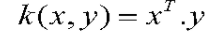

# Support Vector Regression: <a class="anchor" id="12"></a>

Source: https://stats.stackexchange.com/questions/13194/support-vector-machines-and-regression

Visit the above source for more information.

SVR gives us the flexibility to define how much error is acceptable in our model and will find an appropriate line (or hyperplane in higher dimensions) to fit the data.

<img src="https://i.stack.imgur.com/ZyGQp.png" width=700>

Source: https://towardsdatascience.com/an-introduction-to-support-vector-regression-svr-a3ebc1672c2

## Cost Function <a class="anchor" id="13"></a>


<img src="https://miro.medium.com/max/308/1*6M8yyY7yC7xJX6nFN2SdCQ.png" width=150>

with constraints:
<img src="https://miro.medium.com/max/342/1*gpN_ZxDuLgusn-O0fck13A.png" width=200>

Example:

<img src="https://miro.medium.com/max/945/1*nrXHNqC_hqpyux7GUbtqAQ.png" width=500>

SVR Prediction on Bouston Housing data set with epsilon=5:
<img src="https://miro.medium.com/max/818/1*bSZn9bK43MaA5vVDamRQ2A.png" width=500>

As you can see in tha above graph, that this algorithm doesn’t work for all data points. We need to account for the possibility of errors that are larger than ϵ. We can do this with slack variables.

## Slack variables and Cost Function <a class="anchor" id="14"></a>

The concept of slack variables is simple: for any value that falls outside of ϵ, we can denote its deviation from the margin as ξ.

<img src="https://miro.medium.com/max/537/1*6Pk3E2Mkg99jXbQTFla99Q.png" width=200>

with constraints:
<img src="https://miro.medium.com/max/477/1*2BcaD3X72lAj7IezAOLJxg.png" width=200>

Example:
<img src="https://miro.medium.com/max/945/1*BunsGiCZCPAHzp33L2lCBA.png" width=500>

# Assumptions of SVM: <a class="anchor" id="15"></a>

IID is the fundamental assumption of almost all statistical learning methods but SVM makes no assumptions about the data just like decision trees.

Source: https://stackoverflow.com/questions/35422072/major-assumptions-of-machine-learning-classifiers-lg-svm-and-decision-trees

# Hyperparameter Optimization: <a class="anchor" id="16"></a>

Source: 

- Theory: https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167

- Code: https://www.kaggle.com/udaysa/svm-with-scikit-learn-svm-with-parameter-tuning

Gamma parameter of RBF controls the distance of influence of a single training point. Low values of gamma indicates a large similarity radius which results in more points being grouped together. For high values of gamma, the points need to be very close to each other in order to be considered in the same group (or class). Therefore, models with very large gamma values tend to overfit.

<img src="https://miro.medium.com/max/705/1*5HfMQaH2m3xFy_6aJdTyHw.png" width=300>
<img src="https://miro.medium.com/max/732/1*HJULljMrR2a5cjnlaVz5RA.png" width=400>

For a linear kernel, we just need to optimize the c parameter. However, if we want to use an RBF kernel, both c and gamma parameter need to optimized simultaneously. If gamma is large, the effect of c becomes negligible. If gamma is small, c affects the model just like how it affects a linear model. Typical values for c and gamma are as follows. However, specific optimal values may exist depending on the application:

<b> 0.0001 < gamma < 10
    
0.1 < c < 100 </b>

# Solution to Overfitting: <a class="anchor" id="17"></a>

Source: https://web.engr.oregonstate.edu/~tgd/classes/534/slides/part10.pdf

1. If your SVM model is overfitting, you can try regularizing it by reducing C. (The 'C' is soft margin equation)

2. Maximize margin 'γ'

3. Minimize slack vector ||ξ||

# Pros vs Cons: <a class="anchor" id="18"></a>

## Pros:

1. It is really effective in the higher dimension.
2. Effective when the number of features are more than training examples.
3. Best algorithm when classes are separable
4. The hyperplane is affected by only the support vectors thus outliers have less impact.
5. SVM is suited for extreme case binary classification.

## Cons:

1. For larger dataset, it requires a large amount of time to process.
2. Does not perform well in case of overlapped classes.
3. Selecting, appropriately hyperparameters of the SVM that will allow for sufficient generalization performance.
4. Selecting the appropriate kernel function can be tricky.

# Sources: <a class="anchor" id="19"></a>
https://towardsdatascience.com/mathematics-behind-svm-support-vector-machines-84742ddda0ca
https://towardsdatascience.com/an-introduction-to-support-vector-regression-svr-a3ebc1672c2
https://towardsdatascience.com/support-vector-machines-svm-c9ef22815589